In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sie import *
from sie.mcmc import *

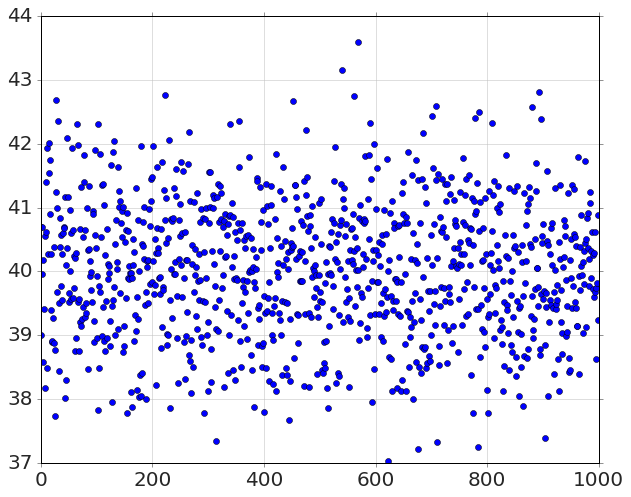

In [3]:
N=1000
y=randn(N)+40
x=arange(N)
plot(x,y,'o')

Sampling Prior...
Done.
0.24 s
Running MCMC...
Done.
1.36 s


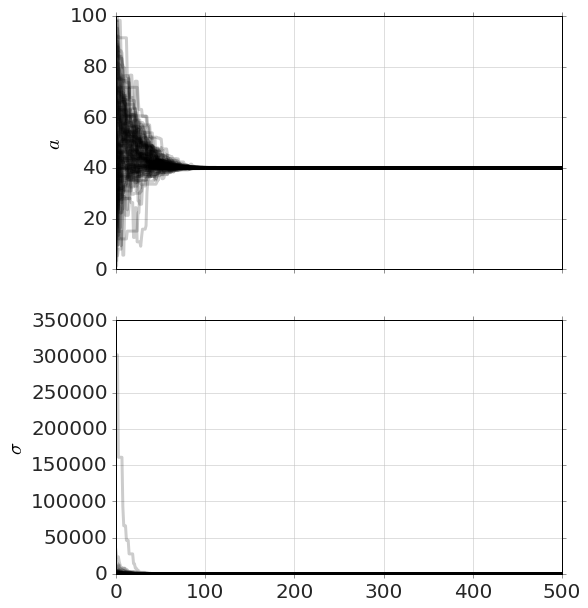

In [4]:
def constant(x,a):
    return a

model=MCMCModel(x,y,constant,
            a=Uniform(0,100),
            )
model.run_mcmc(500)
model.plot_chains()

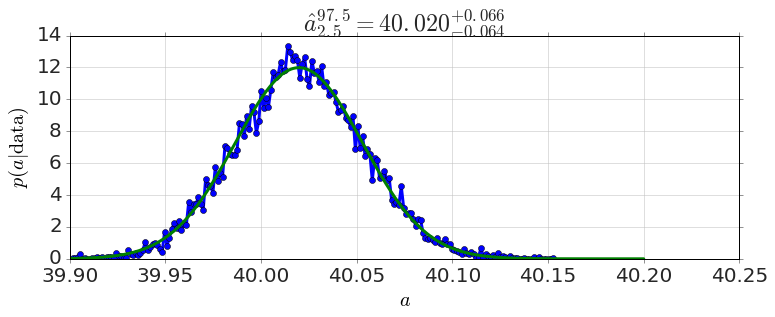

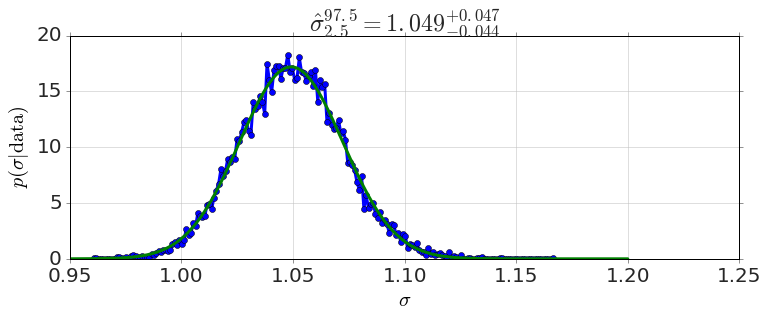

In [5]:
model.plot_distributions()

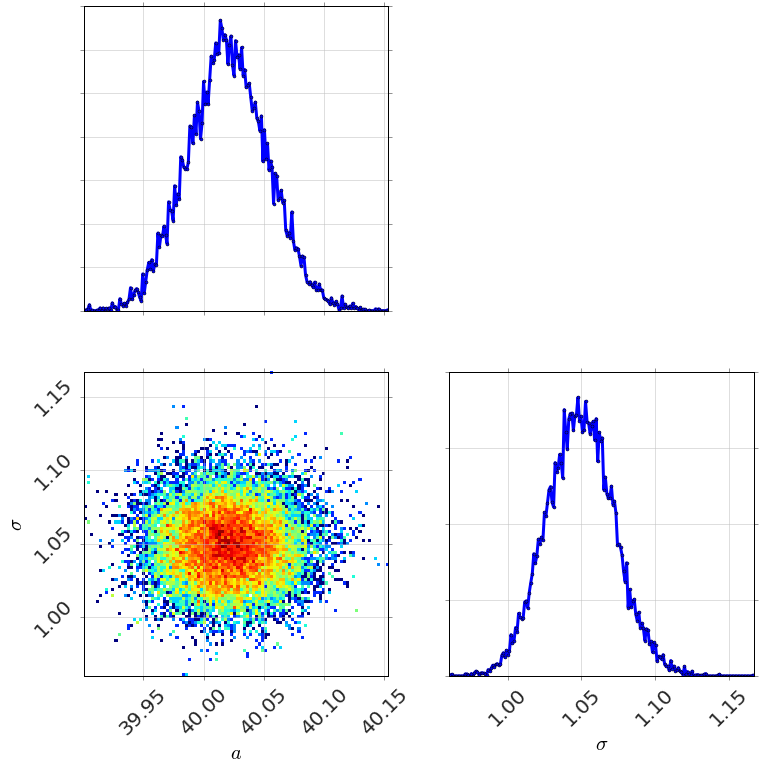

In [6]:
model.triangle_plot()

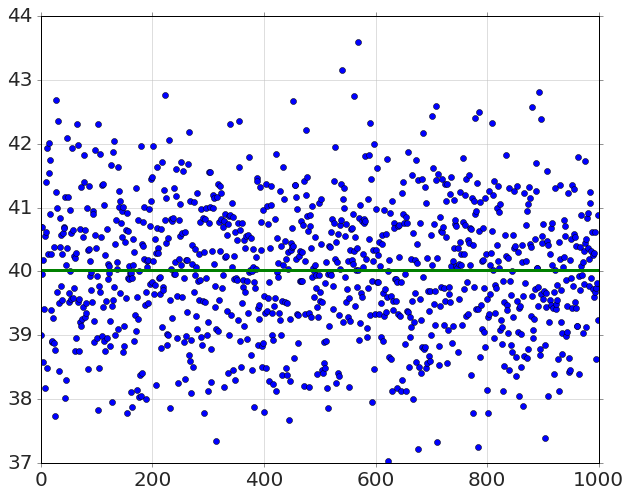

In [7]:
plot(x,y,'o')

xfit=linspace(0,1000,200)
yfit=model.predict(xfit)

plot(xfit,yfit,'-')

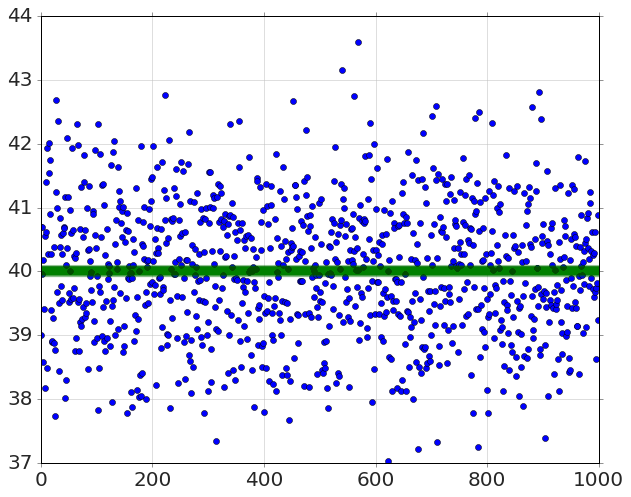

In [8]:
plot(x,y,'o')

xfit=linspace(0,1000,200)
model.plot_predictions(xfit,color='g')

## Linear Model

Sampling Prior...
Done.
0.31 s
Running MCMC...
Done.
1.88 s


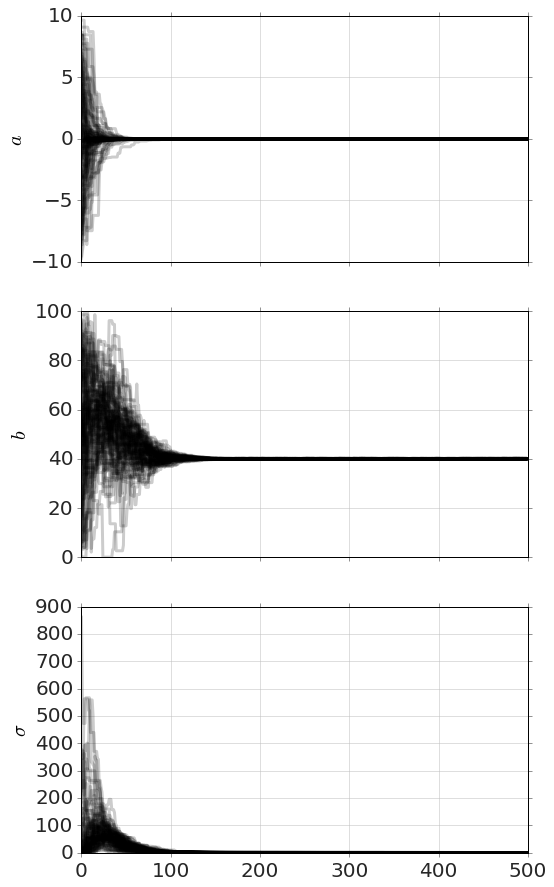

In [9]:
def linear(x,a,b):
    return a*x+b

model=MCMCModel(x,y,linear,
                a=Uniform(-10,10),
                b=Uniform(0,100),
                )

model.run_mcmc(500)
model.plot_chains()

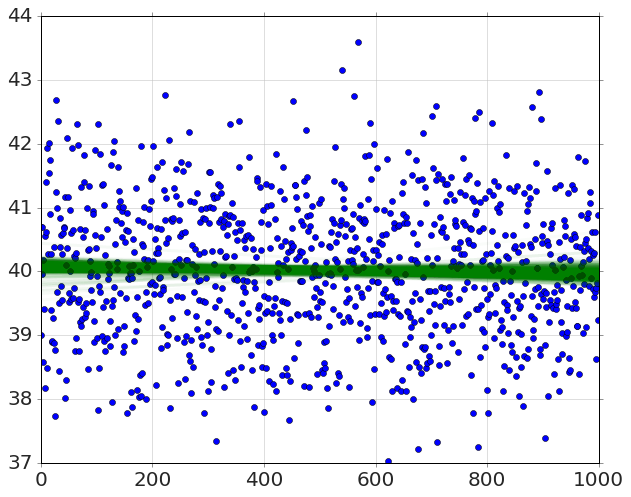

In [10]:
plot(x,y,'o')

xfit=linspace(0,1000,200)
model.plot_predictions(xfit,color='g')

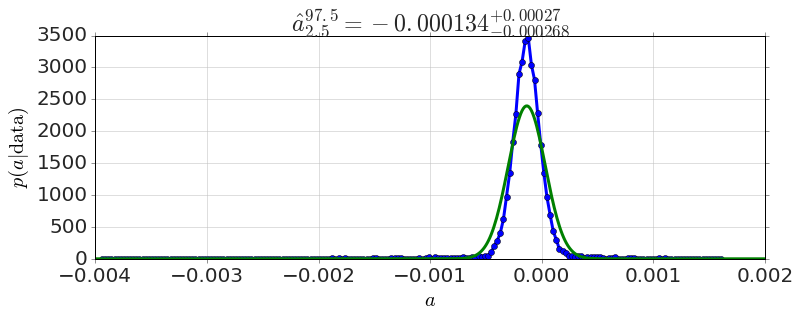

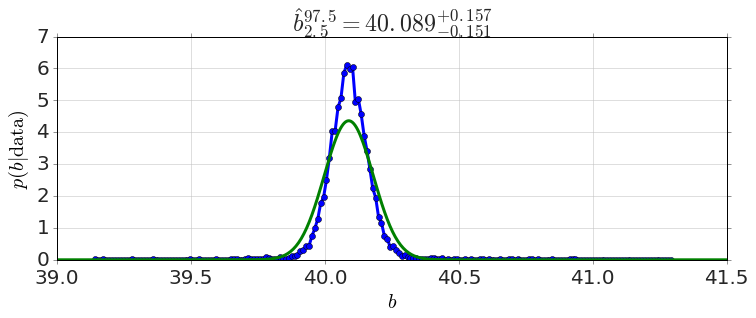

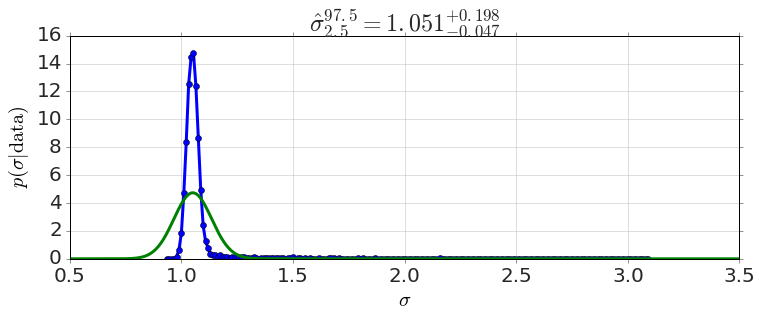

In [11]:
model.plot_distributions()

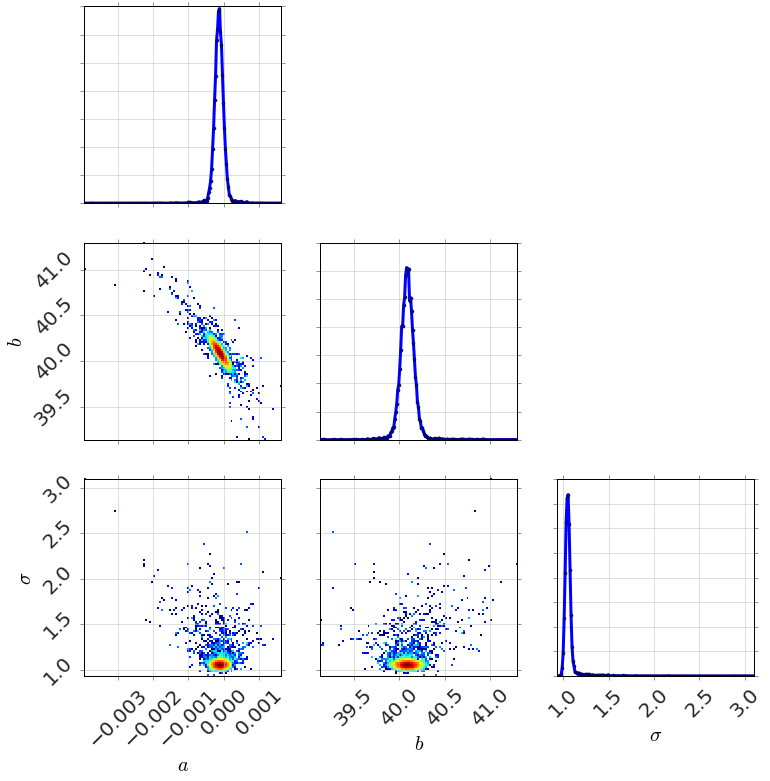

In [12]:
model.triangle_plot()

In [13]:
model.percentiles([5,50,95])

{'_sigma': array([ 1.01094036,  1.05094735,  1.1219379 ]),
 'a': array([ -3.43015828e-04,  -1.34012325e-04,   7.88518760e-05]),
 'b': array([ 39.97022123,  40.08895439,  40.21041817])}

## Fitting a possion process

In [14]:
x=np.random.poisson(lam=10,size=1000)

In [15]:
def lnprior(mu):
    if 0<=mu<=100:
        return 0.0
    return -np.inf

def lnlike(data,mu):
    return log(mu)*sum(data)-mu*len(data)


In [16]:
model=MCMCModel2(x,lnprior,lnlike,
                mu=Uniform(0,100))

Sampling Prior...
Done.
0.12 s
Running MCMC...
Done.
0.63 s


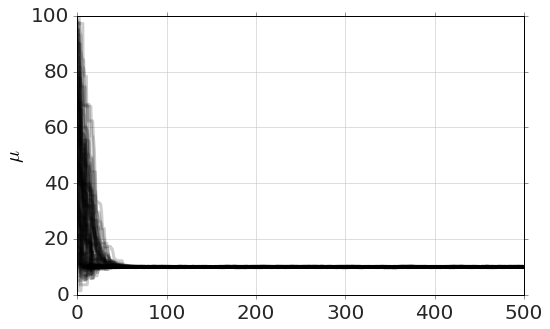

In [17]:
model.run_mcmc(500)
model.plot_chains()

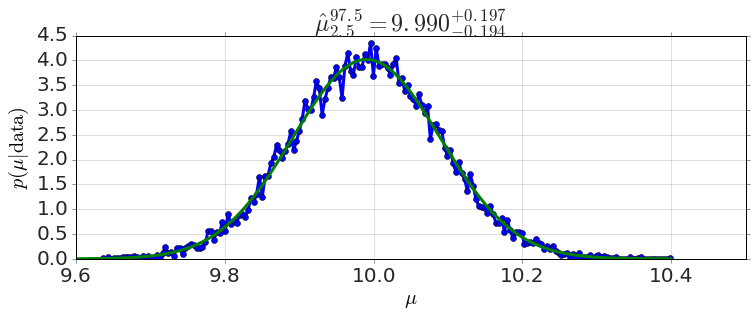

In [18]:
model.plot_distributions()